In [198]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [199]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/product_review_analysis/raw_data/restaurant_data/data_breakfast_club.csv', header=None)

In [200]:
df= df.rename({1: 'text', 2: 'score'}, axis = 1)

In [201]:
df = df.dropna()

In [202]:
df['score'] = df['score'].astype(int)

In [203]:
df_negative = df[df.score < 4]

In [204]:
pos_reviews = df.text
neg_reviews = df_negative.text

In [205]:
pos_reviews = pd.DataFrame(pos_reviews)
neg_reviews = pd.DataFrame(neg_reviews)

In [206]:
def cleaning(sentence):
    
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase 
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    
    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = set(stopwords.words('english')) ## define stopwords
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_sentence_cleaned
    ]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence

In [207]:
pos_reviews_cleaned = pos_reviews["text"].apply(cleaning)
neg_reviews_cleaned = neg_reviews["text"].apply(cleaning)
pos_reviews_cleaned = pd.DataFrame(pos_reviews_cleaned)
neg_reviews_cleaned = pd.DataFrame(neg_reviews_cleaned)

In [208]:
vectorizer_pos = TfidfVectorizer(ngram_range = (1,1), 
                             min_df=0.01, 
                             max_df = 0.05).fit(pos_reviews_cleaned.text)

In [209]:
vectorizer_neg = TfidfVectorizer(ngram_range = (1,1), 
                             min_df=0.01, 
                             max_df = 0.05).fit(neg_reviews_cleaned.text)

In [210]:
vectors_pos = pd.DataFrame(vectorizer_pos.transform(pos_reviews_cleaned.text).toarray(),
                       columns = vectorizer_pos.get_feature_names_out())
vectors_pos.head()

,able,absolute,absolutely,accommodate,across,actually,add,afternoon,ago,al,...,years,yellow,yelp,yes,yet,yogurt,yolk,youd,youll,yummy
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.215924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.205187,0.0,0.0,0.182261


In [211]:
vectors_neg = pd.DataFrame(vectorizer_neg.transform(neg_reviews_cleaned.text).toarray(),
                       columns = vectorizer_neg.get_feature_names_out())
vectors_neg.head()

,able,across,add,aesthetically,afraid,afternoon,ago,ahead,alas,allamerican,...,yeah,years,yelp,yes,yet,yogurt,york,youd,youve,yummy
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.196633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.179466,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
sum_tfidf_pos = vectors_pos.sum(axis = 0)
sum_tfidf_pos

able           3.436513
absolute       1.806868
absolutely     5.262616
accommodate    2.198937
across         1.328364
                 ...   
yogurt         1.721726
yolk           1.319600
youd           2.709893
youll          2.542381
yummy          2.979954
Length: 605, dtype: float64

In [213]:
sum_tfidf_neg = vectors_neg.sum(axis = 0)
sum_tfidf_neg

able             0.591651
across           0.430062
add              0.526642
aesthetically    0.411019
afraid           0.266895
                   ...   
yogurt           0.563712
york             0.392395
youd             1.348042
youve            0.553531
yummy            0.381789
Length: 653, dtype: float64

In [214]:
tfidf_list_pos = [(word, sum_tfidf_pos[word]) 
              for word, idx in vectorizer_pos.vocabulary_.items() 
              if word in vectorizer_pos.vocabulary_.keys() ]
tfidf_list_pos

[('dry', 4.9893069905351375),
 ('flavor', 5.005291326652911),
 ('reason', 2.620568840384809),
 ('french', 3.6361002278073675),
 ('werent', 3.1628142148763083),
 ('lol', 1.969755945751541),
 ('wife', 3.810629561169113),
 ('stop', 3.5036563439653388),
 ('grab', 1.63241776833291),
 ('must', 6.274594627203654),
 ('quickly', 4.425347509356367),
 ('server', 3.7536955467009023),
 ('allamerican', 1.9704779333660776),
 ('latte', 4.046786926895814),
 ('chicken', 6.313835014631844),
 ('chocolate', 5.163630230021825),
 ('oh', 4.769035126186776),
 ('man', 1.5935906016866654),
 ('absolutely', 5.262615954895218),
 ('cook', 5.169590763255366),
 ('perfectly', 3.2293655745546648),
 ('plan', 2.1009069229367556),
 ('attentive', 3.263823844557502),
 ('drink', 4.813016772882937),
 ('slightly', 2.7794812482828504),
 ('wonderful', 4.451119304981258),
 ('highly', 6.096316131304026),
 ('share', 5.94455122360065),
 ('hash', 4.99890472037186),
 ('brown', 3.58017173235982),
 ('group', 4.474601575522733),
 ('waitre

In [215]:
tfidf_list_neg = [(word, sum_tfidf_neg[word]) 
              for word, idx in vectorizer_neg.vocabulary_.items() 
              if word in vectorizer_neg.vocabulary_.keys() ]
tfidf_list_neg

[('nyc', 0.5609179215543945),
 ('tourist', 0.8860182439428022),
 ('extensive', 0.503123608055512),
 ('cost', 0.6341876647773855),
 ('cramp', 1.1418721819929478),
 ('honestly', 1.4244086017905184),
 ('minute', 1.157389345087313),
 ('choice', 1.0298373707075863),
 ('base', 0.9769193503491079),
 ('yelp', 1.542804340388779),
 ('stop', 0.5841958447222276),
 ('weekday', 0.9234821368618553),
 ('recent', 0.46089407106085045),
 ('rainy', 0.345994754252808),
 ('couple', 1.2544946259135397),
 ('location', 1.1342128584004723),
 ('set', 0.9232705467129428),
 ('local', 0.4664894216348987),
 ('highly', 0.6022501347678695),
 ('banana', 1.0847778423591825),
 ('french', 1.0711270061511002),
 ('may', 0.8859101859305791),
 ('idea', 1.334298609303042),
 ('cappuccino', 0.3615513908308277),
 ('lack', 1.1983869442347312),
 ('wish', 0.8005899569175657),
 ('warm', 1.0097951934108422),
 ('able', 0.5916510154604837),
 ('linger', 0.3364756381858981),
 ('longer', 0.6293975563095915),
 ('must', 0.6642261335563086),


In [216]:
sorted_tfidf_list_pos =sorted(tfidf_list_pos, key = lambda x: x[1], reverse=True)
sorted_tfidf_list_pos = sorted_tfidf_list_pos[:20]

In [217]:
sorted_tfidf_list_neg =sorted(tfidf_list_neg, key = lambda x: x[1], reverse=True)
sorted_tfidf_list_neg = sorted_tfidf_list_neg[:20]

In [218]:
sorted_tfidf_list_neg

[('weekend', 2.1126916128706306),
 ('regular', 2.0482307432995106),
 ('prepare', 2.0201867007600054),
 ('early', 1.91891358979657),
 ('sunday', 1.9112883684408013),
 ('either', 1.8394276666194564),
 ('value', 1.839143887852486),
 ('quality', 1.8235784983261383),
 ('bean', 1.8060694538979316),
 ('move', 1.789341552914043),
 ('style', 1.7888546228910656),
 ('least', 1.7535897576640513),
 ('space', 1.7460427891022938),
 ('smoothie', 1.709374234289824),
 ('wrong', 1.7046858454176894),
 ('put', 1.6852863940721248),
 ('group', 1.6782465440442504),
 ('pm', 1.6768213469704252),
 ('veggie', 1.6704973850643203),
 ('single', 1.6607190945047896)]

In [219]:
sorted_tfidf_list_pos

[('excellent', 6.986899929016826),
 ('crowd', 6.87000224994313),
 ('sunday', 6.69805286535592),
 ('weekend', 6.6574046502306325),
 ('hype', 6.525564949766074),
 ('black', 6.412764633490013),
 ('sandwich', 6.375734016011541),
 ('fast', 6.316869883059135),
 ('chicken', 6.313835014631844),
 ('hours', 6.291984946718105),
 ('sweet', 6.279237505934339),
 ('must', 6.274594627203654),
 ('door', 6.274200370602446),
 ('cant', 6.190082278678902),
 ('half', 6.179551364842312),
 ('average', 6.129832799730979),
 ('highly', 6.096316131304026),
 ('pancake', 6.075508485735637),
 ('music', 6.029916556585138),
 ('mins', 5.99517844760911)]

<function matplotlib.pyplot.show(close=None, block=None)>

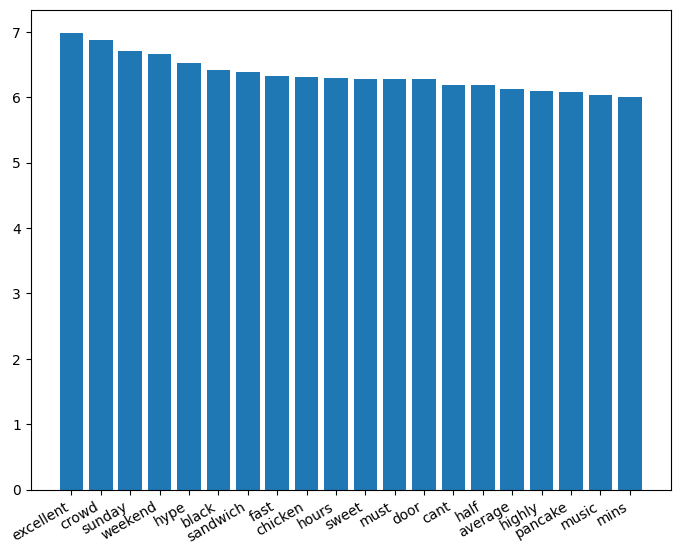

In [220]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
words = [tup[0] for tup in sorted_tfidf_list_pos]
scores = [tup[1] for tup in sorted_tfidf_list_pos]
ax.bar(words, scores)
plt.xticks(rotation=30, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

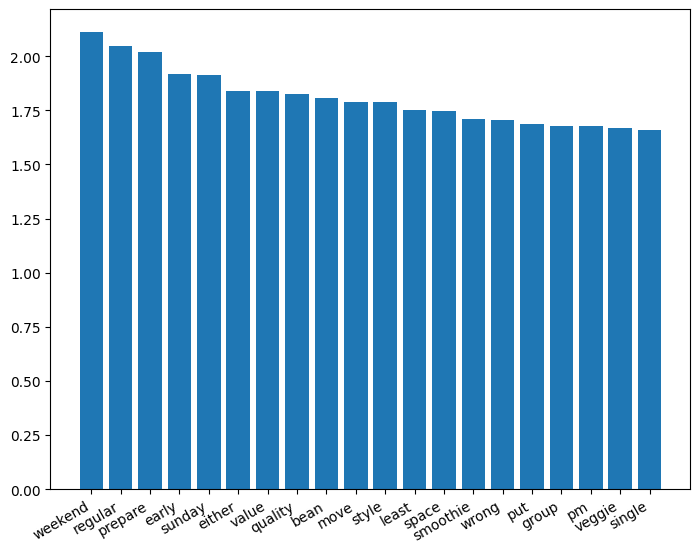

In [221]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
words = [tup[0] for tup in sorted_tfidf_list_neg]
scores = [tup[1] for tup in sorted_tfidf_list_neg]
ax.bar(words, scores)
plt.xticks(rotation=30, ha='right')
plt.show